<a href="https://colab.research.google.com/github/ramoants254/100--accuracy-heart-disease-classification/blob/main/100_accuracy_heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease Prediction Project

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score,roc_curve


## Data Preprocessing

In [71]:
df=pd.read_csv('/content/drive/MyDrive/Heart-Disease/HeartDiseaseTrain-Test.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [72]:
df.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1
1024,54,Male,Typical angina,120,188,Lower than 120 mg/ml,ST-T wave abnormality,113,No,1.4,Flat,One,Reversable Defect,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [74]:
df.isna().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholestoral,0
fasting_blood_sugar,0
rest_ecg,0
Max_heart_rate,0
exercise_induced_angina,0
oldpeak,0


In [75]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [76]:
df.shape

(1025, 14)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [78]:
df.target.value_counts()

,count
target,
1,526
0,499


<Axes: xlabel='target'>

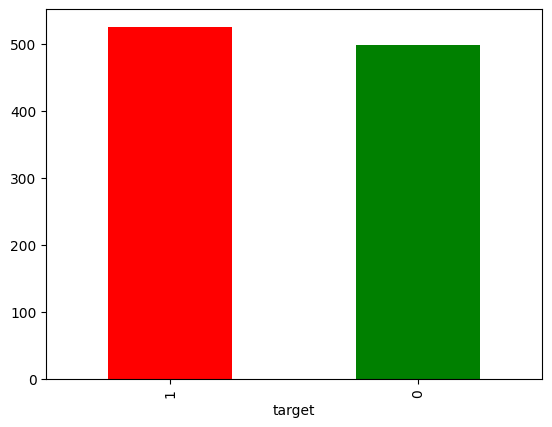

In [79]:
df.target.value_counts().plot(kind='bar',color=['red','green'])

## Compairing Columns

In [80]:
df.sex.value_counts()

,count
sex,
Male,713
Female,312


<Axes: xlabel='sex'>

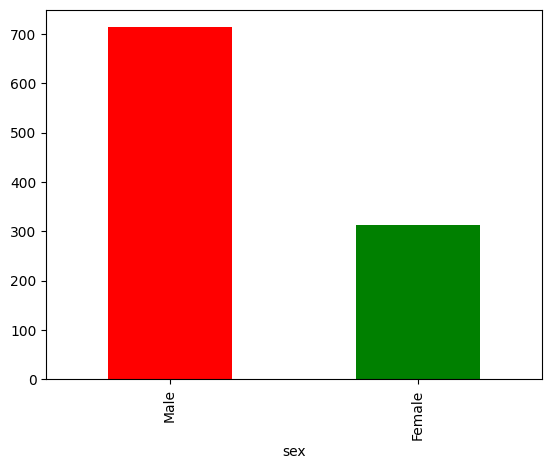

In [81]:
df.sex.value_counts().plot(kind='bar',color=['red','green'])

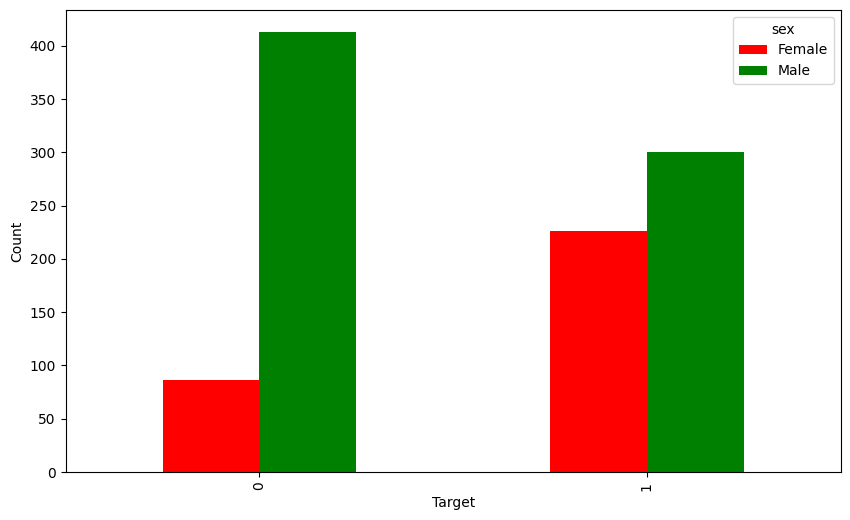

In [82]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['red','green'])
#plt.xticks(rotation='0')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

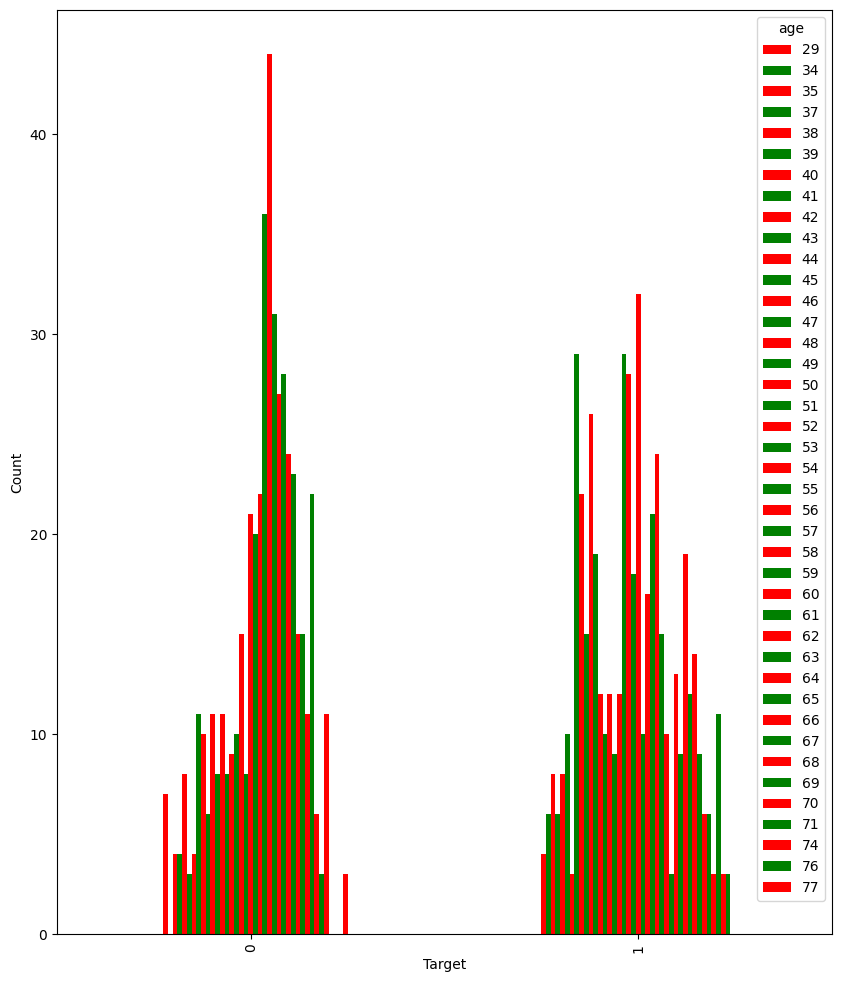

In [83]:
pd.crosstab(df.target,df.age).plot(kind='bar',figsize=(10,12),color=['red','green'])
#plt.xticks(rotation='0')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

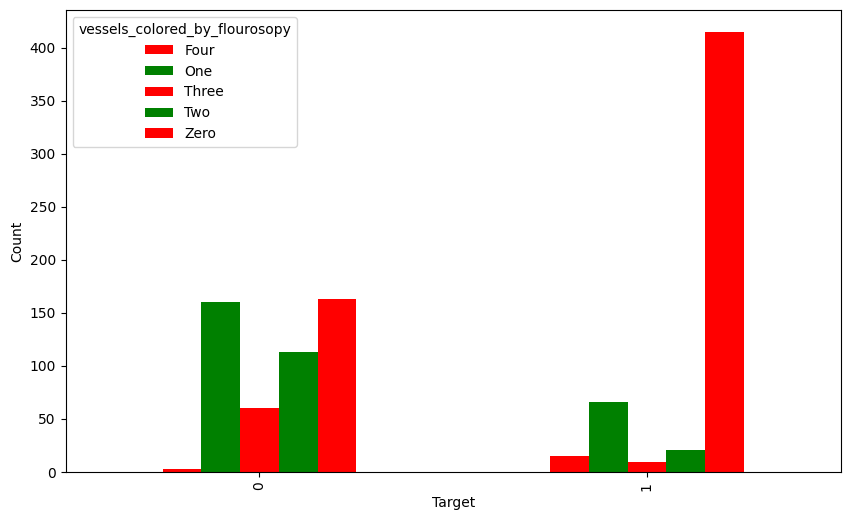

In [84]:
crosstab=pd.crosstab(df.target,df.vessels_colored_by_flourosopy)
crosstab
plot=crosstab.plot(kind='bar',figsize=(10,6),color=['red','green'])
#plt.xticks(rotation='0')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

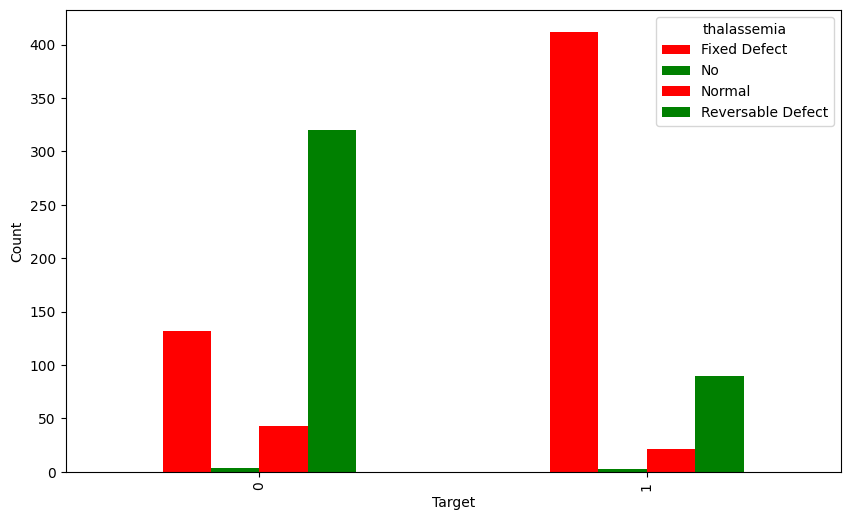

In [85]:
crosstab=pd.crosstab(df.target,df.thalassemia)
crosstab
plot=crosstab.plot(kind='bar',figsize=(10,6),color=['red','green'])
#plt.xticks(rotation='0')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

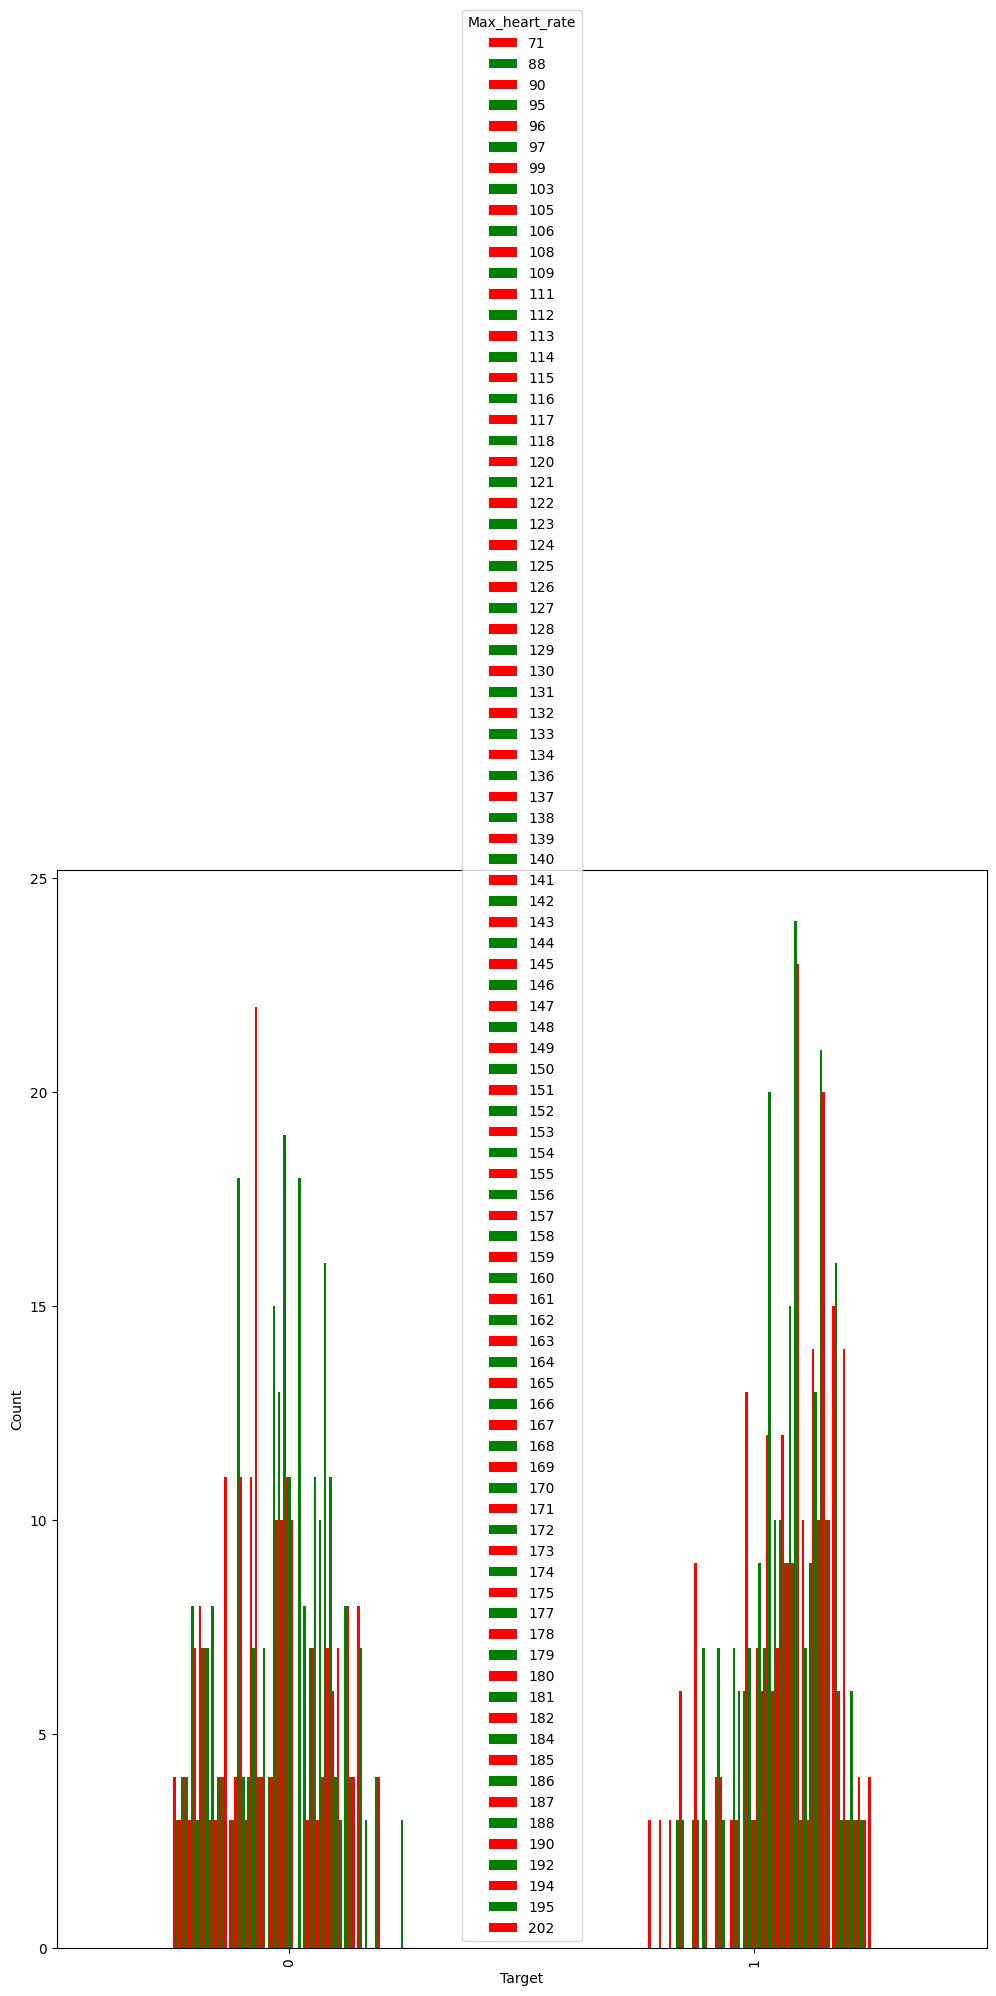

In [86]:
crosstab=pd.crosstab(df.target,df.Max_heart_rate)
crosstab
plot=crosstab.plot(kind='bar',figsize=(12,14),color=['red','green'])
#plt.xticks(rotation='0')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

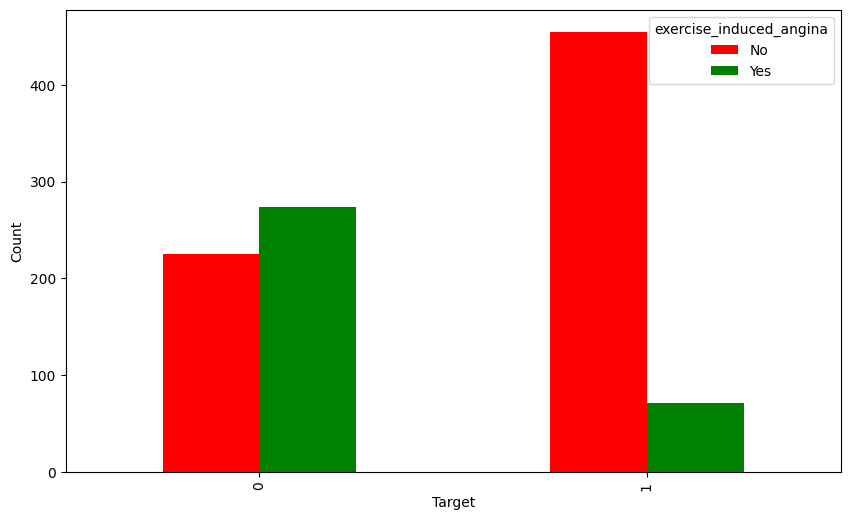

In [87]:
crosstab=pd.crosstab(df.target,df.exercise_induced_angina)
crosstab
plot=crosstab.plot(kind='bar',figsize=(10,6),color=['red','green'])
#plt.xticks(rotation='0')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

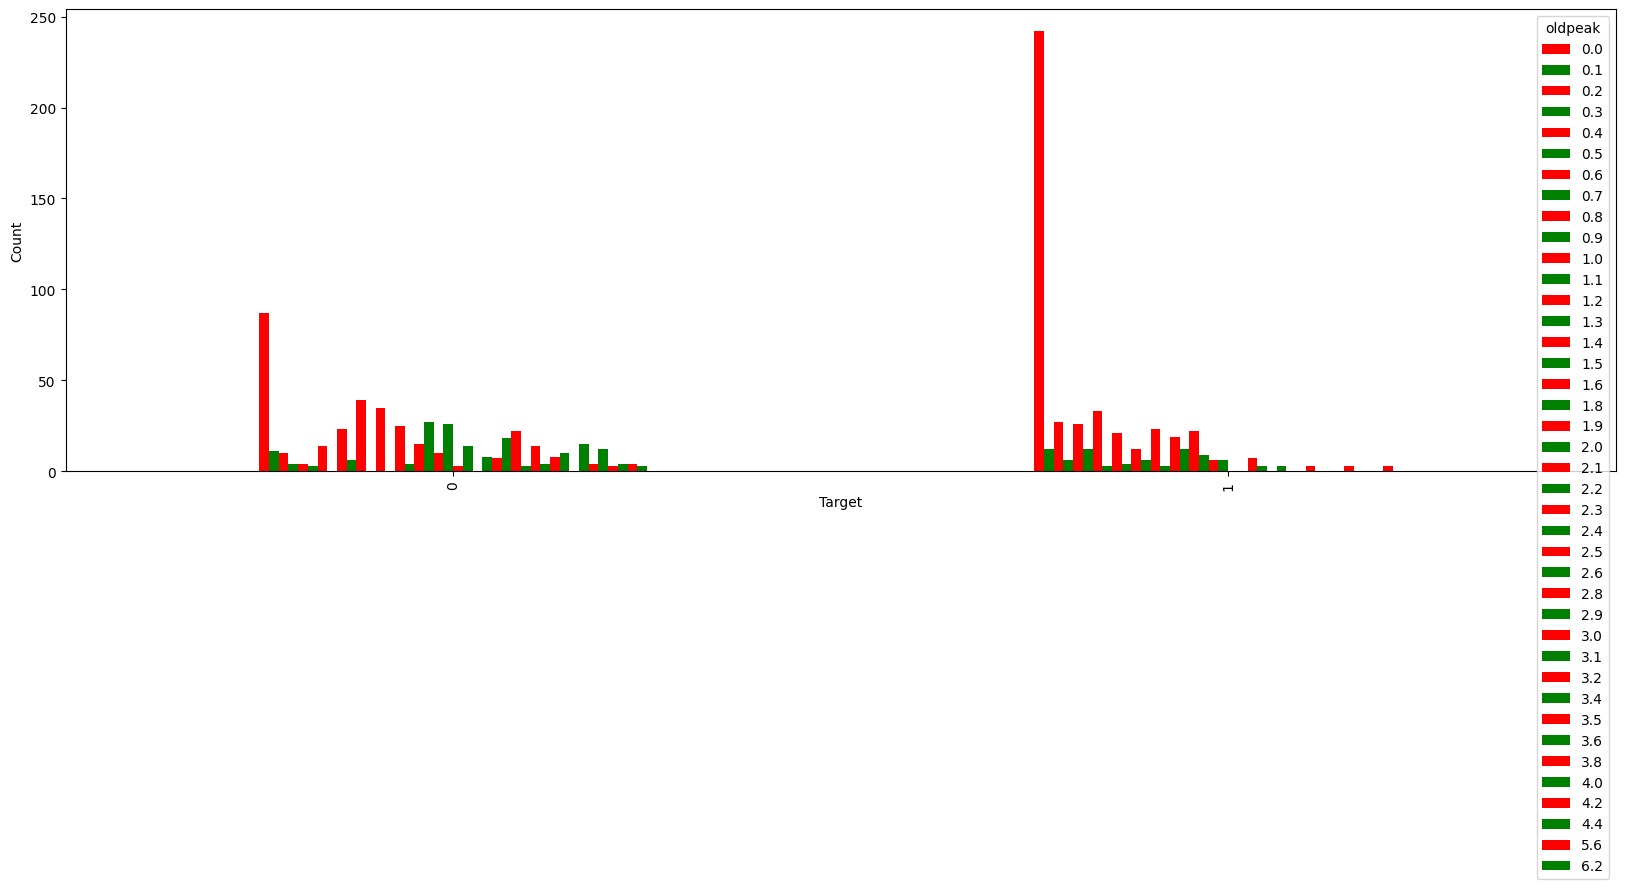

In [88]:
crosstab=pd.crosstab(df.target,df.oldpeak)
crosstab
plot=crosstab.plot(kind='bar',figsize=(20,6),color=['red','green'])
#plt.xticks(rotation='0')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

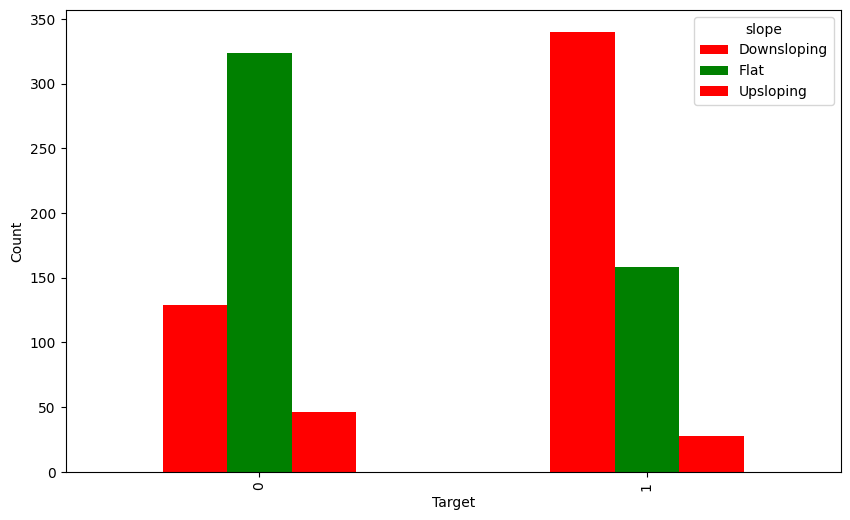

In [89]:
crosstab=pd.crosstab(df.target,df.slope)
crosstab
plot=crosstab.plot(kind='bar',figsize=(10,6),color=['red','green'])
#plt.xticks(rotation='0')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

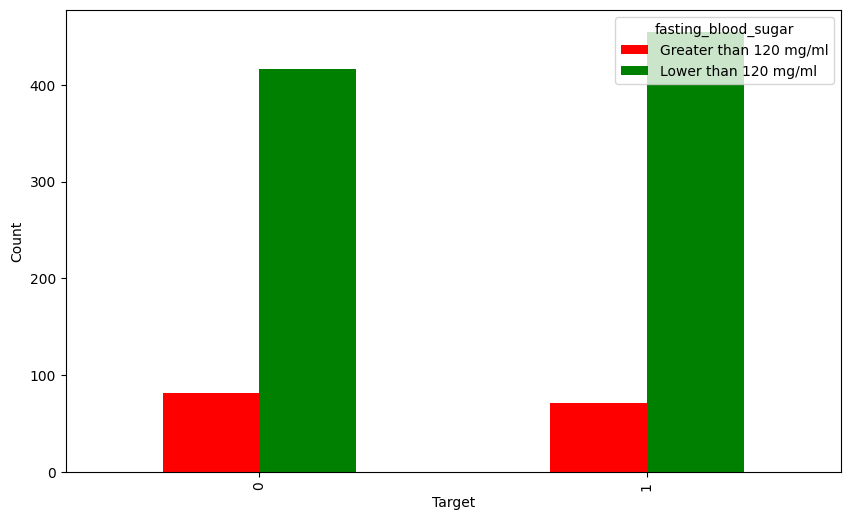

In [90]:
crosstab=pd.crosstab(df.target,df.fasting_blood_sugar)
crosstab
plot=crosstab.plot(kind='bar',figsize=(10,6),color=['red','green'])
#plt.xticks(rotation='0')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

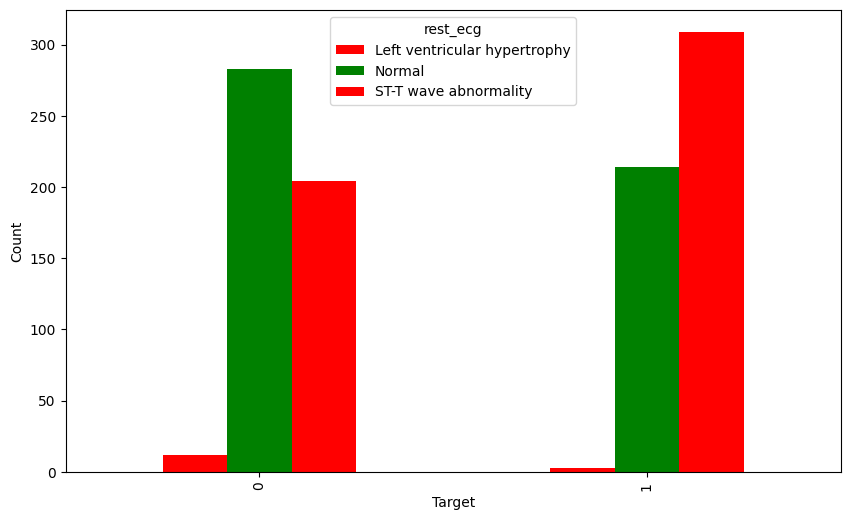

In [91]:
crosstab=pd.crosstab(df.target,df.rest_ecg)
crosstab
plot=crosstab.plot(kind='bar',figsize=(10,6),color=['red','green'])
#plt.xticks(rotation='0')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

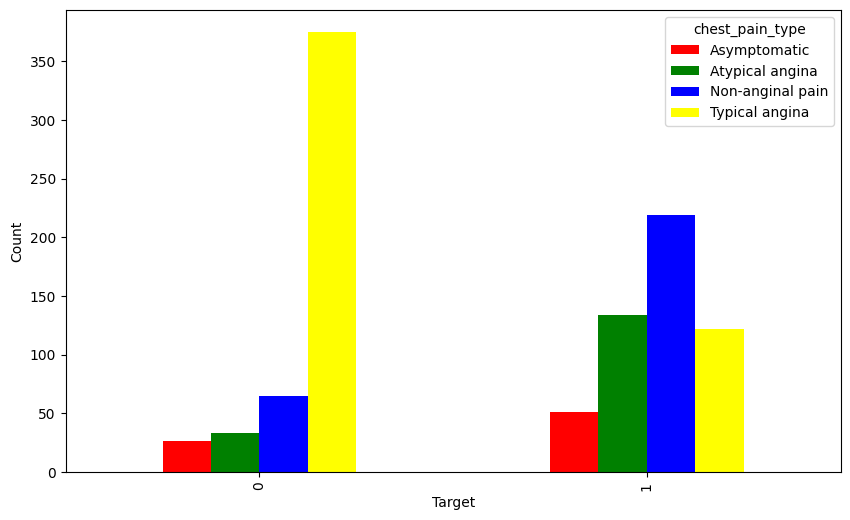

In [92]:
crosstab=pd.crosstab(df.target,df.chest_pain_type)
crosstab
plot=crosstab.plot(kind='bar',figsize=(10,6),color=['red','green','blue','yellow'])
#plt.xticks(rotation='0')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

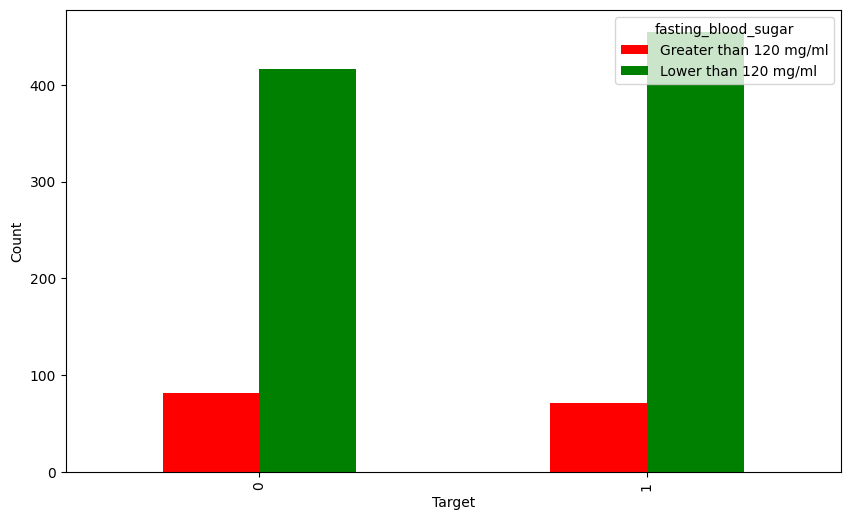

In [93]:
crosstab=pd.crosstab(df.target,df.fasting_blood_sugar)
crosstab
plot=crosstab.plot(kind='bar',figsize=(10,6),color=['red','green'])
#plt.xticks(rotation='0')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [94]:
df.fasting_blood_sugar.value_counts()

,count
fasting_blood_sugar,
Lower than 120 mg/ml,872
Greater than 120 mg/ml,153


In [95]:
df['cholestoral_bins'] = pd.cut(df['cholestoral'], bins=[100, 200, 300, 400], labels=['Low', 'Normal', 'High'])
df.cholestoral_bins.value_counts()

,count
cholestoral_bins,
Normal,707
Low,172
High,133


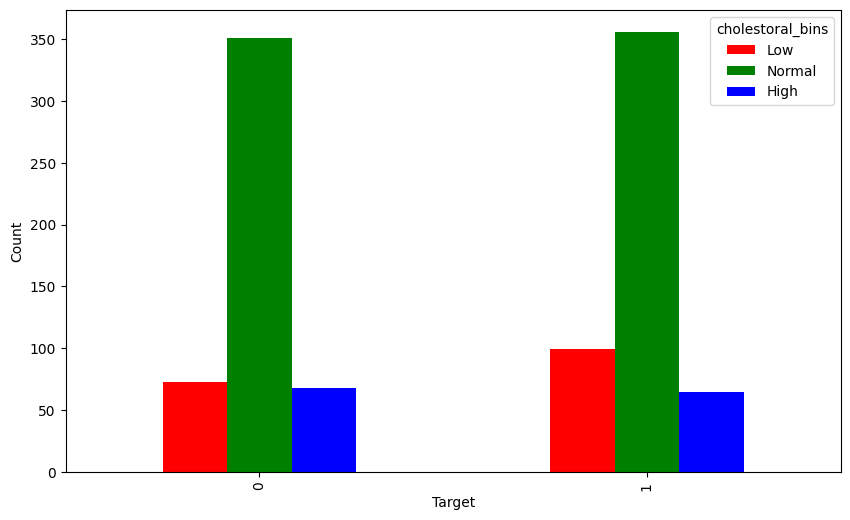

In [96]:
crosstab=pd.crosstab(df.target,df.cholestoral_bins)
crosstab
plot=crosstab.plot(kind='bar',figsize=(10,6),color=['red','green','blue'])
#plt.xticks(rotation='0')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [97]:
df=df.drop(['cholestoral'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            1025 non-null   int64   
 1   sex                            1025 non-null   object  
 2   chest_pain_type                1025 non-null   object  
 3   resting_blood_pressure         1025 non-null   int64   
 4   fasting_blood_sugar            1025 non-null   object  
 5   rest_ecg                       1025 non-null   object  
 6   Max_heart_rate                 1025 non-null   int64   
 7   exercise_induced_angina        1025 non-null   object  
 8   oldpeak                        1025 non-null   float64 
 9   slope                          1025 non-null   object  
 10  vessels_colored_by_flourosopy  1025 non-null   object  
 11  thalassemia                    1025 non-null   object  
 12  target                         102

In [98]:
df=pd.get_dummies(data=df,drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age                                       1025 non-null   int64  
 1   resting_blood_pressure                    1025 non-null   int64  
 2   Max_heart_rate                            1025 non-null   int64  
 3   oldpeak                                   1025 non-null   float64
 4   target                                    1025 non-null   int64  
 5   sex_Male                                  1025 non-null   bool   
 6   chest_pain_type_Atypical angina           1025 non-null   bool   
 7   chest_pain_type_Non-anginal pain          1025 non-null   bool   
 8   chest_pain_type_Typical angina            1025 non-null   bool   
 9   fasting_blood_sugar_Lower than 120 mg/ml  1025 non-null   bool   
 10  rest_ecg_Normal                     

## Splitting the dataset

In [99]:
X=df.drop('target',axis=1)
y=df['target']

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)


In [101]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((820, 23), (205, 23), (820,), (205,))

In [102]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Developing Models

In [103]:
models={'Logistic Regression':LogisticRegression(),
        'KNN':KNeighborsClassifier(),
        'Random Forest':RandomForestClassifier(),
        'XGB Classifier':XGBClassifier()
        }

def fit_and_score(models,X_train,X_test,y_train,y_test):
  np.random.seed(42)
  model_scores={}
  for name,model in models.items():
    model.fit(X_train,y_train)
    model_scores[name]=model.score(X_test,y_test)
  return model_scores

## Model Comparisons

In [104]:
fit_and_score(models=models,
              X_train=X_train,
              X_test=X_test,
              y_train=y_train,
              y_test=y_test)

{'Logistic Regression': 0.8097560975609757,
 'KNN': 0.8878048780487805,
 'Random Forest': 0.9853658536585366,
 'XGB Classifier': 0.9853658536585366}

<Axes: >

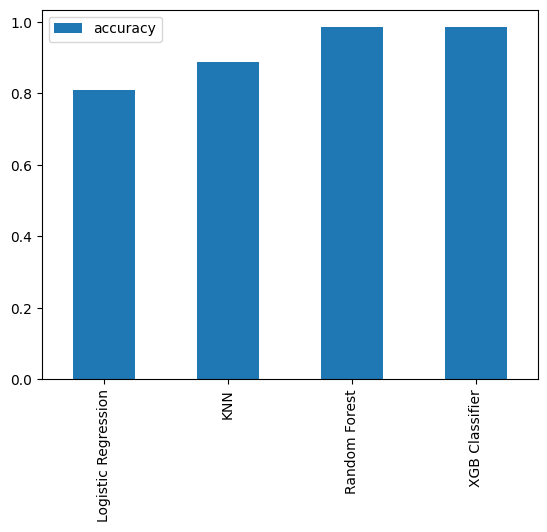

In [105]:
model_compare=pd.DataFrame(fit_and_score(models=models,
              X_train=X_train,
              X_test=X_test,
              y_train=y_train,
              y_test=y_test),index=['accuracy'])
model_compare.T.plot(kind='bar')

## Hyper-parameter Tuning

In [106]:
# Define hyperparameter grids for models
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

param_grid_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance']
}

param_grid_rf = {
    'n_estimators': [10, 1000, 50],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

In [107]:
# Create RandomizedSearchCV objects for each model
rs_logreg = RandomizedSearchCV(LogisticRegression(), param_grid_logreg, n_iter=10, cv=5, random_state=42)
rs_knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid_knn, n_iter=10, cv=5, random_state=42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid_rf, n_iter=10, cv=5, random_state=42)
rs_xgb = RandomizedSearchCV(XGBClassifier(), param_grid_xgb, n_iter=10, cv=5, random_state=42)

# Fit each RandomizedSearchCV object
rs_logreg.fit(X_train, y_train)
rs_knn.fit(X_train, y_train)
rs_rf.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [108]:
# Check the best parameters and scores
print("Best parameters for Logistic Regression:", rs_logreg.best_params_)
print("Best score for Logistic Regression:", rs_logreg.best_score_)

print("Best parameters for KNN:", rs_knn.best_params_)
print("Best score for KNN:", rs_knn.best_score_)

print("Best parameters for Random Forest:", rs_rf.best_params_)
print("Best score for Random Forest:", rs_rf.best_score_)

print("Best parameters for XGB Classifier:", rs_xgb.best_params_)
print("Best score for XGB Classifier:", rs_xgb.best_score_)


Best parameters for Logistic Regression: {'solver': 'liblinear', 'C': 10}
Best score for Logistic Regression: 0.8841463414634146
Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 23}
Best score for KNN: 0.9829268292682928
Best parameters for Random Forest: {'n_estimators': 1000, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_depth': 10}
Best score for Random Forest: 0.9243902439024391
Best parameters for XGB Classifier: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1}
Best score for XGB Classifier: 0.9829268292682926


In [109]:
model=XGBClassifier(learning_rate=0.1,max_depth=7,n_estimators=100)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [110]:
y_pred=model.predict(X_test)

In [111]:
accuracy_score(y_test,y_pred)
# precision_score(y_test,y_pred)
# recall_score(y_test,y_pred)
# f1_score(y_test,y_pred)
# confusion_matrix(y_test,y_pred)
# classification_report(y_test,y_pred)
# roc_auc_score(y_test,y_pred)
# roc_curve(y_test,y_pred)


0.9853658536585366

In [112]:
model_2=RandomForestClassifier(n_estimators=1000, max_depth=5, min_samples_split=6, min_samples_leaf=5, random_state=42)
model_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=6,
                       n_estimators=1000, random_state=42)

In [113]:
y_pred=model_2.predict(X_test)

In [114]:
accuracy_score(y_test,y_pred)

0.8536585365853658

In [115]:
model_3=KNeighborsClassifier(n_neighbors=29, weights='distance')
model_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29, weights='distance')

In [116]:
model_3.score(X_test,y_test)

1.0

In [117]:
y_pred=model_3.predict(X_test)

In [118]:
ac=accuracy_score(y_test,y_pred)
ac

1.0

## Model Evaluation

In [124]:
roc_auc_score(y_test,y_pred)

1.0

In [127]:
cm=confusion_matrix(y_test,y_pred)
display=pd.DataFrame(cm,columns=['Predicted Negative','Predicted Positive'],index=['Actual Negative','Actual Positive'])
display

,Predicted Negative,Predicted Positive
Actual Negative,102,0
Actual Positive,0,103


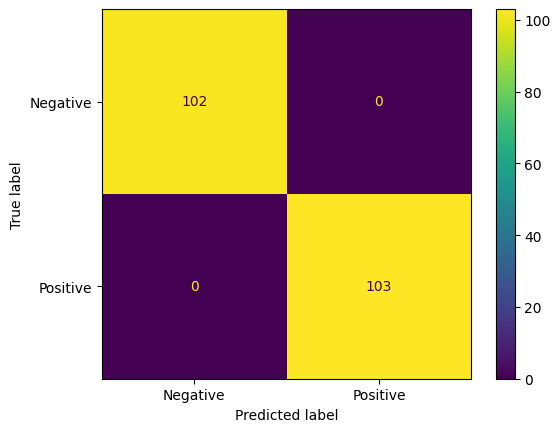

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Negative','Positive'])
display.plot()